In [1]:
import torch
import torch.nn as nn
import numpy as np 
import os
import imageio
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm

from dataset import get_rays 
from rendering import Rendering
from model import Voxels, NeRF
from ml_helpers import training

## Camera/Dataset

In [3]:
batch_size=1024

o,d, target_px_values=get_rays('fox',mode='train')
dataloader=DataLoader(torch.cat((torch.from_numpy(o).reshape(-1,3).type(torch.float),
                                 torch.from_numpy(d).reshape(-1,3).type(torch.float),
                                 torch.from_numpy(target_px_values).reshape(-1,3).type(torch.float)), dim=1),
                    batch_size=batch_size,shuffle=True)

dataloader_warmup=DataLoader(torch.cat((torch.from_numpy(o).reshape(90,400,400,3)[:,100:300,100:300,:].reshape(-1,3).type(torch.float),
                                 torch.from_numpy(d).reshape(90,400,400,3)[:,100:300,100:300,:].reshape(-1,3).type(torch.float),
                                 torch.from_numpy(target_px_values).reshape(90,400,400,3)[:,100:300,100:300,:].reshape(-1,3).type(torch.float)), dim=1),
                    batch_size=batch_size,shuffle=True) 

test_o, test_d, test_target_px_values=get_rays('fox',mode='test')

## Training

100%|██████████| 14063/14063 [33:39<00:00,  6.97it/s]


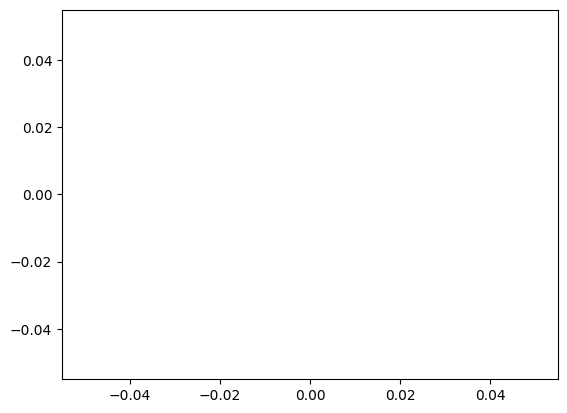

In [ ]:
device='cuda'

tn=8.
tf=12.
nb_epochs=15
lr=1e-3
gamma=.5
nb_bins=100

model=NeRF().to(device)

optimizer=torch.optim.Adam(model.parameters(),lr=lr)
scheduler=torch.optim.lr_scheduler.MultiStepLR(optimizer,milestones=[5,10],gamma=gamma)


training_loss=training(model, optimizer, scheduler, tn, tf, nb_bins, 1, dataloader_warmup, device=device)
training_loss=training(model, optimizer, scheduler, tn, tf, nb_bins, nb_epochs, dataloader, device=device)

In [5]:
torch.save(model,'model_nerf')

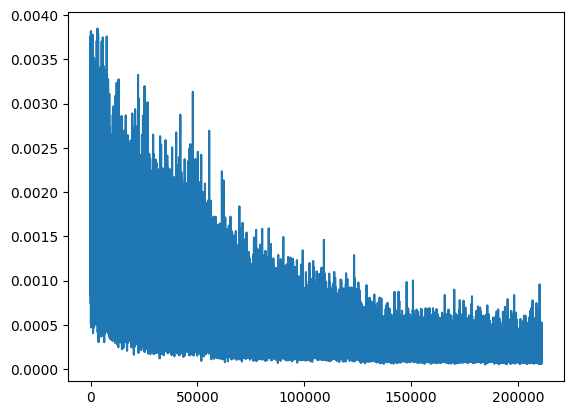

In [ ]:
plt.plot(training_loss)